In [47]:
import pandas as pd
import numpy as np
import glob as gl
import matplotlib.pyplot as plt
import os

# CONSTANTES

In [48]:
PROJECT_ROUTE="D:/WILMERAMEZQUITA/workspace/ml_telefonia"
SOURCE_DIRECTORY_CLIENTS = "/data/excel/"
SOURCE_DIRECTORY_CALLS = "/data/csv/"
SOURCE_FILE_CALLS = "/data/csv/Noviembre2019.csv"
SOURCE_FILE_CLIENTS = "/data/excel/Noviembre (2019).xlsx"

# FUNCIONES

Obtiene el nombre del mes desde la ruta del archivo

In [49]:
def getMonthNameFromSource(source):
    filename = os.path.basename(source)
    month = filename.split(" ")[0]
    return month

Elimina columnas vacías de los archivos fuente

In [50]:
def deleteEmptyColumn(dataframe,nameColumn):
    if nameColumn in dataframe:
        dataframe.rename({nameColumn:"a"}, axis="columns", inplace=True)
        dataframe.drop(["a"], axis=1, inplace=True)
    return dataframe

Elimina cualquier columna que tenga el nombre Unnamed

In [51]:
def deleteAnyEmptyColumn(dataframe):
    for i in range(0,50):
        nameColumn = "Unnamed: "+str(i)
        if nameColumn in dataframe:
            dataframe.rename({nameColumn:"a"}, axis="columns", inplace=True)
            dataframe.drop(["a"], axis=1, inplace=True)
    return dataframe

Obtiene el año a partir del nombre del archivo

In [52]:
def getYearFromSource(source):
    filename = os.path.basename(source)
    split1 = filename.split(" ")
    split2 = split1[1].split(")")
    year = split2[0]
    return year.replace("(","")

Retorna el número del més a partir del nombre

In [53]:
def getMonthNumberFromName(monthName):
    monthName = str(monthName).upper() 
    if "ENE" in monthName or "JAN" in monthName:
        return 1
    if "FEB" in monthName:
        return 2
    if "MAR" in monthName:
        return 3
    if "ABR" in monthName or "APR" in monthName:
        return 4
    if "MAY" in monthName:
        return 5
    if "JUN" in monthName:
        return 6
    if "JUL" in monthName:
        return 7
    if "AGO" in monthName or "AUG" in monthName:
        return 8
    if "SEP" in monthName:
        return 9
    if "OCT" in monthName:
        return 10
    if "NOV" in monthName:
        return 11
    if "DIC" in monthName or "DEC" in monthName:
        return 12
    else:
        return 0

Genera base de datos de clientes retirados.

In [54]:
def generateRetiredDataFrame(df_clients_all):
    
    return null

In [55]:
def generateSuscribedDataFrame(df_clients_all, df_clientes_mes):
    df_clients_all_2019 = df_clients_all[df_clientes_all['año']=='2019']
    df_clients_all_2019
    return null

# PREPROCESAMIENTO DE DATOS

Se lee la lista de archivos de excel que tienen información del cliente

In [56]:
gl.glob(PROJECT_ROUTE+SOURCE_DIRECTORY_CLIENTS+"*.xlsx")

['D:/WILMERAMEZQUITA/workspace/ml_telefonia/data/excel\\Abril (2020).xlsx',
 'D:/WILMERAMEZQUITA/workspace/ml_telefonia/data/excel\\Agosto (2019).xlsx',
 'D:/WILMERAMEZQUITA/workspace/ml_telefonia/data/excel\\Agosto (2020).xlsx',
 'D:/WILMERAMEZQUITA/workspace/ml_telefonia/data/excel\\Diciembre (2019).xlsx',
 'D:/WILMERAMEZQUITA/workspace/ml_telefonia/data/excel\\Enero (2020).xlsx',
 'D:/WILMERAMEZQUITA/workspace/ml_telefonia/data/excel\\Febrero (2020).xlsx',
 'D:/WILMERAMEZQUITA/workspace/ml_telefonia/data/excel\\Julio (2020).xlsx',
 'D:/WILMERAMEZQUITA/workspace/ml_telefonia/data/excel\\Junio (2020).xlsx',
 'D:/WILMERAMEZQUITA/workspace/ml_telefonia/data/excel\\Marzo (2020).xlsx',
 'D:/WILMERAMEZQUITA/workspace/ml_telefonia/data/excel\\Mayo (2020).xlsx',
 'D:/WILMERAMEZQUITA/workspace/ml_telefonia/data/excel\\Noviembre (2019).xlsx',
 'D:/WILMERAMEZQUITA/workspace/ml_telefonia/data/excel\\Octubre (2019).xlsx',
 'D:/WILMERAMEZQUITA/workspace/ml_telefonia/data/excel\\Septiembre (2019).x

Se compila toda la información de clientes en un solo archivo csv

In [57]:
df_users_all = pd.DataFrame()
for file in gl.glob(PROJECT_ROUTE+SOURCE_DIRECTORY_CLIENTS+"*.xlsx"):

    df_users_month = pd.read_excel(file)
    df_users_month = deleteAnyEmptyColumn(df_users_month)
    df_users_month.columns=['ID_cliente','Tipo','Empresa','Antiguedad','Plan','Edad','Sexo','Procedencia','Estudios','Ingresos','Ciudad','Grupo','Estado','N_llamadas','Valor']
    df_users_month['mes']= getMonthNameFromSource(str(file))
    df_users_month['año']= getYearFromSource(str(file))
    df_users_month['N_mes']= getMonthNumberFromName(df_users_month['mes'])
    df_users_all = df_users_all.append(df_users_month,ignore_index=False)
df_users_all

,ID_cliente,Tipo,Empresa,Antiguedad,Plan,Edad,Sexo,Procedencia,Estudios,Ingresos,Ciudad,Grupo,Estado,N_llamadas,Valor,mes,año,N_mes
0,1.0,1.0,No Aplica,18.0,1.0,48.0,M,0.0,2,3.0,0.0,1.0,Low,3.0,9.0,Abril,2020,4
1,2.0,1.0,No Aplica,11.0,1.0,69.0,M,0.0,3,4.0,0.0,1.0,Low,3.0,9.0,Abril,2020,4
2,3.0,1.0,No Aplica,22.0,1.0,31.0,M,1.0,2,2.0,0.0,1.0,Low,2.0,6.0,Abril,2020,4
3,4.0,1.0,No Aplica,3.0,1.0,44.0,H,0.0,3,3.0,1.0,1.0,Low,2.0,6.0,Abril,2020,4
4,5.0,1.0,No Aplica,36.0,1.0,57.0,M,0.0,3,3.0,0.0,1.0,Low,2.0,6.0,Abril,2020,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,1496.0,3.0,Empresa A,37.0,2.0,55.0,M,0.0,3,4.0,1.0,3.0,Super Heavy,21.0,56.7,Septiembre,2019,9
1475,1497.0,3.0,Empresa A,35.0,2.0,48.0,H,0.0,1,3.0,0.0,3.0,Super Heavy,21.0,56.7,Septiembre,2019,9
1476,1498.0,3.0,Empresa B,18.0,2.0,54.0,M,0.0,2,3.0,1.0,3.0,Super Heavy,20.0,54.0,Septiembre,2019,9
1477,1499.0,3.0,Empresa B,38.0,2.0,55.0,H,0.0,2,1.0,0.0,3.0,Super Heavy,22.0,59.4,Septiembre,2019,9


# ANÁLISIS DE DATOS

## Cantidad de clientes por mes
Análisis de la cantidad de clientes de la compañía por més durante el último año

In [58]:
df_clientes_mes = df_users_all.groupby(['N_mes','año']).size().reset_index(name="count").sort_values(['año','N_mes'])
df_clientes_mes.reset_index()
#df_clientes_mes.info()
#df_clientes_mes.drop(['index'],axis=1)
df_clientes_mes

,N_mes,año,count
7,8,2019,1500
9,9,2019,1479
10,10,2019,1458
11,11,2019,1437
12,12,2019,1437
0,1,2020,1405
1,2,2020,1374
2,3,2020,1333
3,4,2020,1297
4,5,2020,1247


<AxesSubplot:title={'center':'SUSCRIPTORES POR MES'}, xlabel='N_mes'>

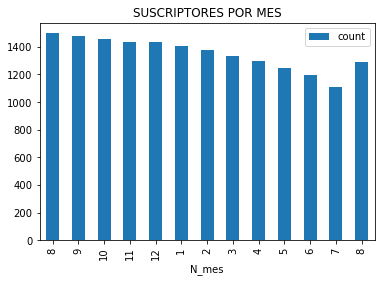

In [59]:
df_clientes_mes.reset_index().plot(x='N_mes',y='count',title="SUSCRIPTORES POR MES",kind='bar',legend=True)

## Conclusiones del primer análisis
Se observa disminución constante desde el mes de agosto de 2019 hasta Julio de 2020. Repunte en agosto de 2020.

## Suscripciones por mes
Se analiza la cantidad de suscripciones nuevas que llegan cada més.

In [60]:
df_clientes_mes = generateSuscribedDataFrame(df_users_all, df_clientes_mes)

NameError: name 'df_clientes_all' is not defined

In [ ]:
df_users.merge(df_calls,'left')

In [ ]:
df_calls = pd.read_csv(PROJECT_ROUTE+SOURCE_FILE_CALLS)
df_calls.columns = ['id','id_cliente','conteo_llamadas','usuario_destino']
df_calls

## Campos de la tabla de usuarios

tipo: 1-Físico | 2-Autonomo | 3-Empresa  
sexo: 1-Hombre | 2-Mujer  
procedencia: 1-Extrangero | 0-Local  
ingresos: 1-Bajo | 2-Medio | 3-Alto | 4-Ejecutivo  
ciudad: 1-Madrid | 2-Barcelona  
valor_pagado: gold 3Euros | premium 2.7Euros  